# Week2 / assignment1

## 1.Explanation of basic statistical terms

#### (1) 標準偏差について、分散との違いや関係性、どんな時に使う指標なのかをお答えください。

標準偏差は「確率分布に対する分散の正の平方根」であり、分散と同じくデータのバラつきを示す指標である。
基礎統計量の一つとしてデータの概要をつかむだけでなく、データの誤差の計算に使う。

#### (2) 共分散行列について述べてください。

共分散行列は「スカラー値をとる確率変数における分散の概念を、多次元に拡張し、行列としたもの」であり、
ベクトル要素間の共分散の行列である。確率変数たちが互いに独立な場合，共分散は全て 0 である。
共分散行列は、データ間の相関係数の計算に用いる。

#### (3) 1次元の正規分布と多次元の正規分布について述べてください。特にどういう時に使うのかについてお答えください。

正規分布(ガウス分布)とは、平均値の付近に集積するようなデータの分布を表した連続的な変数に関する確率分布である。
統計検定での判定基準を決めるのに使用する。

## 2.Create dataset

#### (1) 2次元正規分布を用いて、中心(平均)が(-3,0)と(0,-3)、共分散行列が以下で表現される確率分布から生成されるデータ点を500個ずつ作成せよ。その際、片方の500個のデータにはdata1、もう片方の500個のデータにはdata2と名付けて作成せよ。

In [2]:
from numpy.random import *
from matplotlib import pyplot as plt

"""
As a function to generate normal random numbers according to multidimensional normal distribution N (μ, Σ)

numpy.random.multivariate_normal (mean, cov, size, check_valid, tol)
Are prepared for you. Argument is

loc: Specify the average vector of the normal distribution you want to generate
scale: Specify the variance covariance matrix of the normal distribution you want to generate
size: Specify the number of generated random numbers (default = 1)
check_valid: presence / absence of semidefinite check of variance covariance matrix (specify warn / raise / ignore Optional)
tol: Tolerance for half positive definite check (option)
Specify.

"""

# creat data1
mu_data1 = [-3, 0]
sigma_data1 = [[1.0, 0.8], [0.8, 1.0]]
 
# Generate two-dimensional normal random numbers
data1 = multivariate_normal(mu_data1, sigma_data1, 500)

# creat data2
mu_data2 = [0, -3]
sigma_data2 = [[1.0, 0.8], [0.8, 1.0]]
 
#  Generate two-dimensional normal random numbers
data2 = multivariate_normal(mu_data2, sigma_data2, 500)

## 3.Labeling data points

#### (1) 実際に扱うデータは各データが何のグループに属しているのかラベル付けされていなければなりません。今回は二つの確率分布からデータをサンプリングしていますので、各500個のデータに対して、2つの確率分布のうち、どちらの確率分布からサンプリングされたものなのか、ラベル付けする必要があります。上で作成した500個×2のデータに対してラベル付けをしてください、割り当てるラベルは区別できれば何でもいいですが、ここでは簡単に0と1にしてください。

In [25]:
import numpy as np

def array_info(x):
    print("Array shape", x.shape)
    print("Data type of array element", x.dtype)
    print("Contents of the array\n",x,"\n")

data1_data2_axis0 = np.concatenate([data1, data2], axis=0)

array_info(data1_data2_axis0)

Array shape (1000, 2)
Data type of array element float64
Contents of the array
 [[-3.07283265 -0.62316645]
 [-0.88011231  1.47958083]
 [-2.74661137 -1.15798277]
 ..., 
 [ 0.61688378 -2.21193606]
 [-0.554227   -3.19541083]
 [-2.05957481 -4.24452051]] 



In [46]:
insert_data3 = []

for i in range(1000):
    if i <= 499:
        insert_data3.append(0)
    
    else:
        insert_data3.append(1)
        
combined_data = np.insert(data1_data2_axis0, 2, insert_data3, axis=1)

# test
print(combined_data[0])
print(combined_data[499])
print(combined_data[500])
print(combined_data[999])

[-3.07283265 -0.62316645  0.        ]
[-2.77384763  0.12082264  0.        ]
[-0.92892289 -4.06618904  1.        ]
[-2.05957481 -4.24452051  1.        ]


## 4. Check labeling

#### 前回の課題でも登場したmatplotlibを使って可視化しましょう。雛形として以下を用いてください。?の部分はご自身で考えてください。

##### import matplotlib.pyplot as plt
##### %matplotlib inline
##### plt.scatter(?, ?, s=50, c=?, marker='o')
##### plt.show()

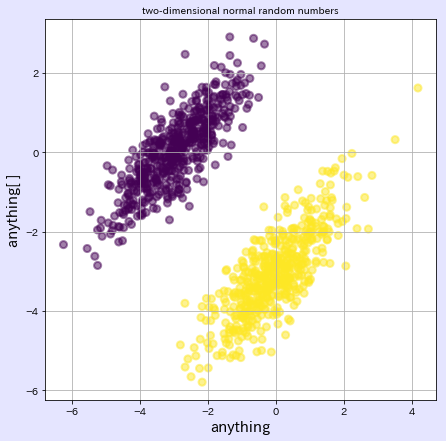

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(7, 7))
fig.patch.set_facecolor('blue')
fig.patch.set_alpha(0.1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
plt.grid()

plt.title("two-dimensional normal random numbers", size=10, color='black')
plt.xlabel("anything", size=15)
plt.ylabel("anything[ ]", size=15)


plt.scatter(combined_data[:, 0], combined_data[:, 1], s=50, c=combined_data[:, 2], marker='o',
            alpha=0.5, linewidths="2", label=combined_data[:, 2])
plt.show()